In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
import warnings
warnings.filterwarnings("ignore")
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In [2]:
df = pd.read_csv('SalaryData.csv')

In [3]:
df.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [4]:
df.shape

(40, 3)

In [5]:
df.describe(include="all")

Education       Occupation         Salary
count           40               40      40.000000
unique           3                4            NaN
top      Doctorate   Prof-specialty            NaN
freq            16               13            NaN
mean           NaN              NaN  162186.875000
std            NaN              NaN   64860.407506
min            NaN              NaN   50103.000000
25%            NaN              NaN   99897.500000
50%            NaN              NaN  169100.000000
75%            NaN              NaN  214440.750000
max            NaN              NaN  260151.000000

In [6]:
df.dtypes

Education     object
Occupation    object
Salary         int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
Education     40 non-null object
Occupation    40 non-null object
Salary        40 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.0+ KB


In [8]:
df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [9]:
df.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

# Problem 1A:

### Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

In [10]:
Education_1 = df[df['Education']==" Doctorate"]['Salary']
Education_2 = df[df['Education']==" Bachelors"]['Salary']
Education_3 = df[df['Education']==" HS-grad"]['Salary']

Occupation_1 = df[df['Occupation']==" Prof-specialty"]['Salary']
Occupation_2 = df[df['Occupation']==" Sales"]['Salary']
Occupation_3 = df[df['Occupation']==" Adm-clerical"]['Salary']
Occupation_3 = df[df['Occupation']==" Exec-managerial"]['Salary']

In [11]:
from scipy import stats
#The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
#alpha = 0.05
print(stats.shapiro([Education_1]))
print(stats.shapiro([Education_2]))
print(stats.shapiro([Education_3]))

print(stats.shapiro([Occupation_1]))
print(stats.shapiro([Occupation_2]))
print(stats.shapiro([Occupation_3]))

print(stats.anderson(Occupation_1,dist='norm'))
print(stats.anderson(Occupation_2,dist='norm'))
print(stats.anderson(Occupation_3,dist='norm'))

print("\n The shapiro test fails for occupation , So from anderson test, critical value is greater than alpha value.")

(0.8952829837799072, 0.0675690770149231)
(0.9607304334640503, 0.7050924301147461)
(0.885286271572113, 0.1783432960510254)
(0.736305832862854, 0.0013131146552041173)
(0.8897126913070679, 0.11683900654315948)
(0.6901877522468567, 0.007539781276136637)
AndersonResult(statistic=1.5424424719265737, critical_values=array([0.497, 0.566, 0.679, 0.792, 0.942]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.5755046432785171, critical_values=array([0.497, 0.566, 0.679, 0.792, 0.942]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.7842030726712084, critical_values=array([0.72 , 0.82 , 0.984, 1.148, 1.365]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

 The shapiro test fails for occupation , So from anderson test, critical value is greater than alpha value.


### 1.A.1) State the null and the alternate hypothesis for conducting one-way ANOVA for both Education individually.

##### The Hypothesis for the One Way ANOVA are:
    
#####  $H_0$: The mean salary is same across 3 levels of  Education
#####  $H_a$: For at least one level of Education, mean salary of Education level is different


### 1.A.1) State the null and the alternate hypothesis for conducting one-way ANOVA for Occupation individually.

##### The Hypothesis for the One Way ANOVA are:
    
#####  $H_0$: The mean number of salary is the same at 3 levels of  Occupation
#####  $H_a$: For at least one level of Occupation, mean number of salary of Occupation level is different


### 1.A.2) Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results

In [12]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN

**Now, we see that the corresponding p-value is less than alpha (0.05). Thus, we $\textbf{reject}$ the $\textbf{Null Hypothesis}$ ($H_0$).**

### 1.A.3) Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [13]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN

**Now, we see that the corresponding p-value is greater than alpha (0.05). Thus, we $\textbf{fail to reject}$ the $\textbf{Null Hypothesis}$ ($H_0$).**

### 1.A.4) If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

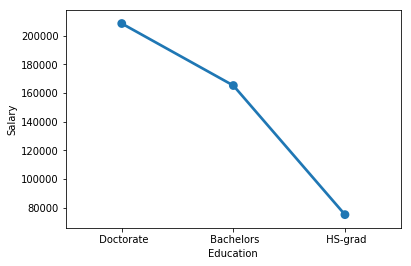

In [14]:
sns.pointplot(x='Education', y='Salary', data=df,ci=None);

###### The null hypothesis is rejected for Salary Vs Education, From this above Pointplot, the Mean are significantly different for all classes.

# Problem 1B:

### 1.) What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]managerial. A different number of observations are in each level of education – occupation combination.

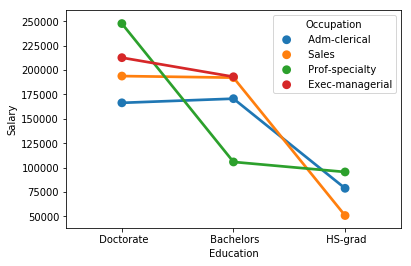

In [15]:
sns.pointplot(x='Education', y='Salary', data=df, hue='Occupation', ci=None);

#### Inference from the above pointplot, Doctorate education in the prof-speciality has the highest salary of 250000, whereas HS-grad education with the sales occupation has the least salary of around 50000.Bachelors education with the occupation (Sales and Exec-managerial) has the same salary of 200000


### 1.B.2) Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

##### The Hypothesis for the One Way ANOVA are:
    
#####  $H_0$: The mean salary is the same at interaction with Education and Occupation
#####  $H_a$: For at least one level of Occupation, mean number of salary of Occupation  and Education Interaction is different


In [16]:
formula = 'Salary ~ C(Occupation) + C(Education) + C(Occupation):C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq          F  \
C(Occupation)                3.0  1.125878e+10  3.752928e+09   5.277862   
C(Education)                 2.0  9.695663e+10  4.847831e+10  68.176603   
C(Occupation):C(Education)   6.0  3.523330e+10  5.872217e+09   8.258287   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Occupation)               4.993238e-03  
C(Education)                1.090908e-11  
C(Occupation):C(Education)  2.913740e-05  
Residual                             NaN

###### The p-Value is less than the alpha (significant value - 0.05). We failed to reject the null hull hypothesis. The mean salary of interacted Education and occupation is same.

### 1.B.3) Explain the business implications of performing ANOVA for this particular case study.

From the ANOVA method and the interaction plot, we see that education combined with occupation results in higher and better salaries among the people. It is clearly seen that people with education as Doctorate draw the maximum salaries and people with education with HS-grad earn the least. Thus, we can conclude that Salary is dependent on educational qualifications and occupation.

### Problem 2:

The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

In [17]:
df = pd.read_csv('Education+-+Post+12th+Standard.csv')

In [18]:
df.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [19]:
df.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Names          777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.3+ KB


In [21]:
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [22]:
df.shape

(777, 18)

## Uni-variate Analysis

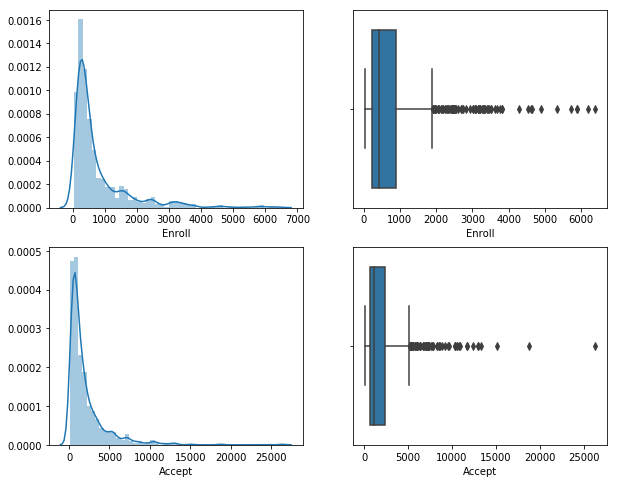

In [23]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.distplot(df['Enroll'], kde=True, ax=axes[0][0])
sns.boxplot(x='Enroll', data=df, ax=axes[0][1])
sns.distplot(df['Accept'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Accept', data=df , ax=axes[1][1])
plt.show()

###### Insights:

Both Enroll and Accept rate have ouliers in upper values.

## Bi-Variate Analysis

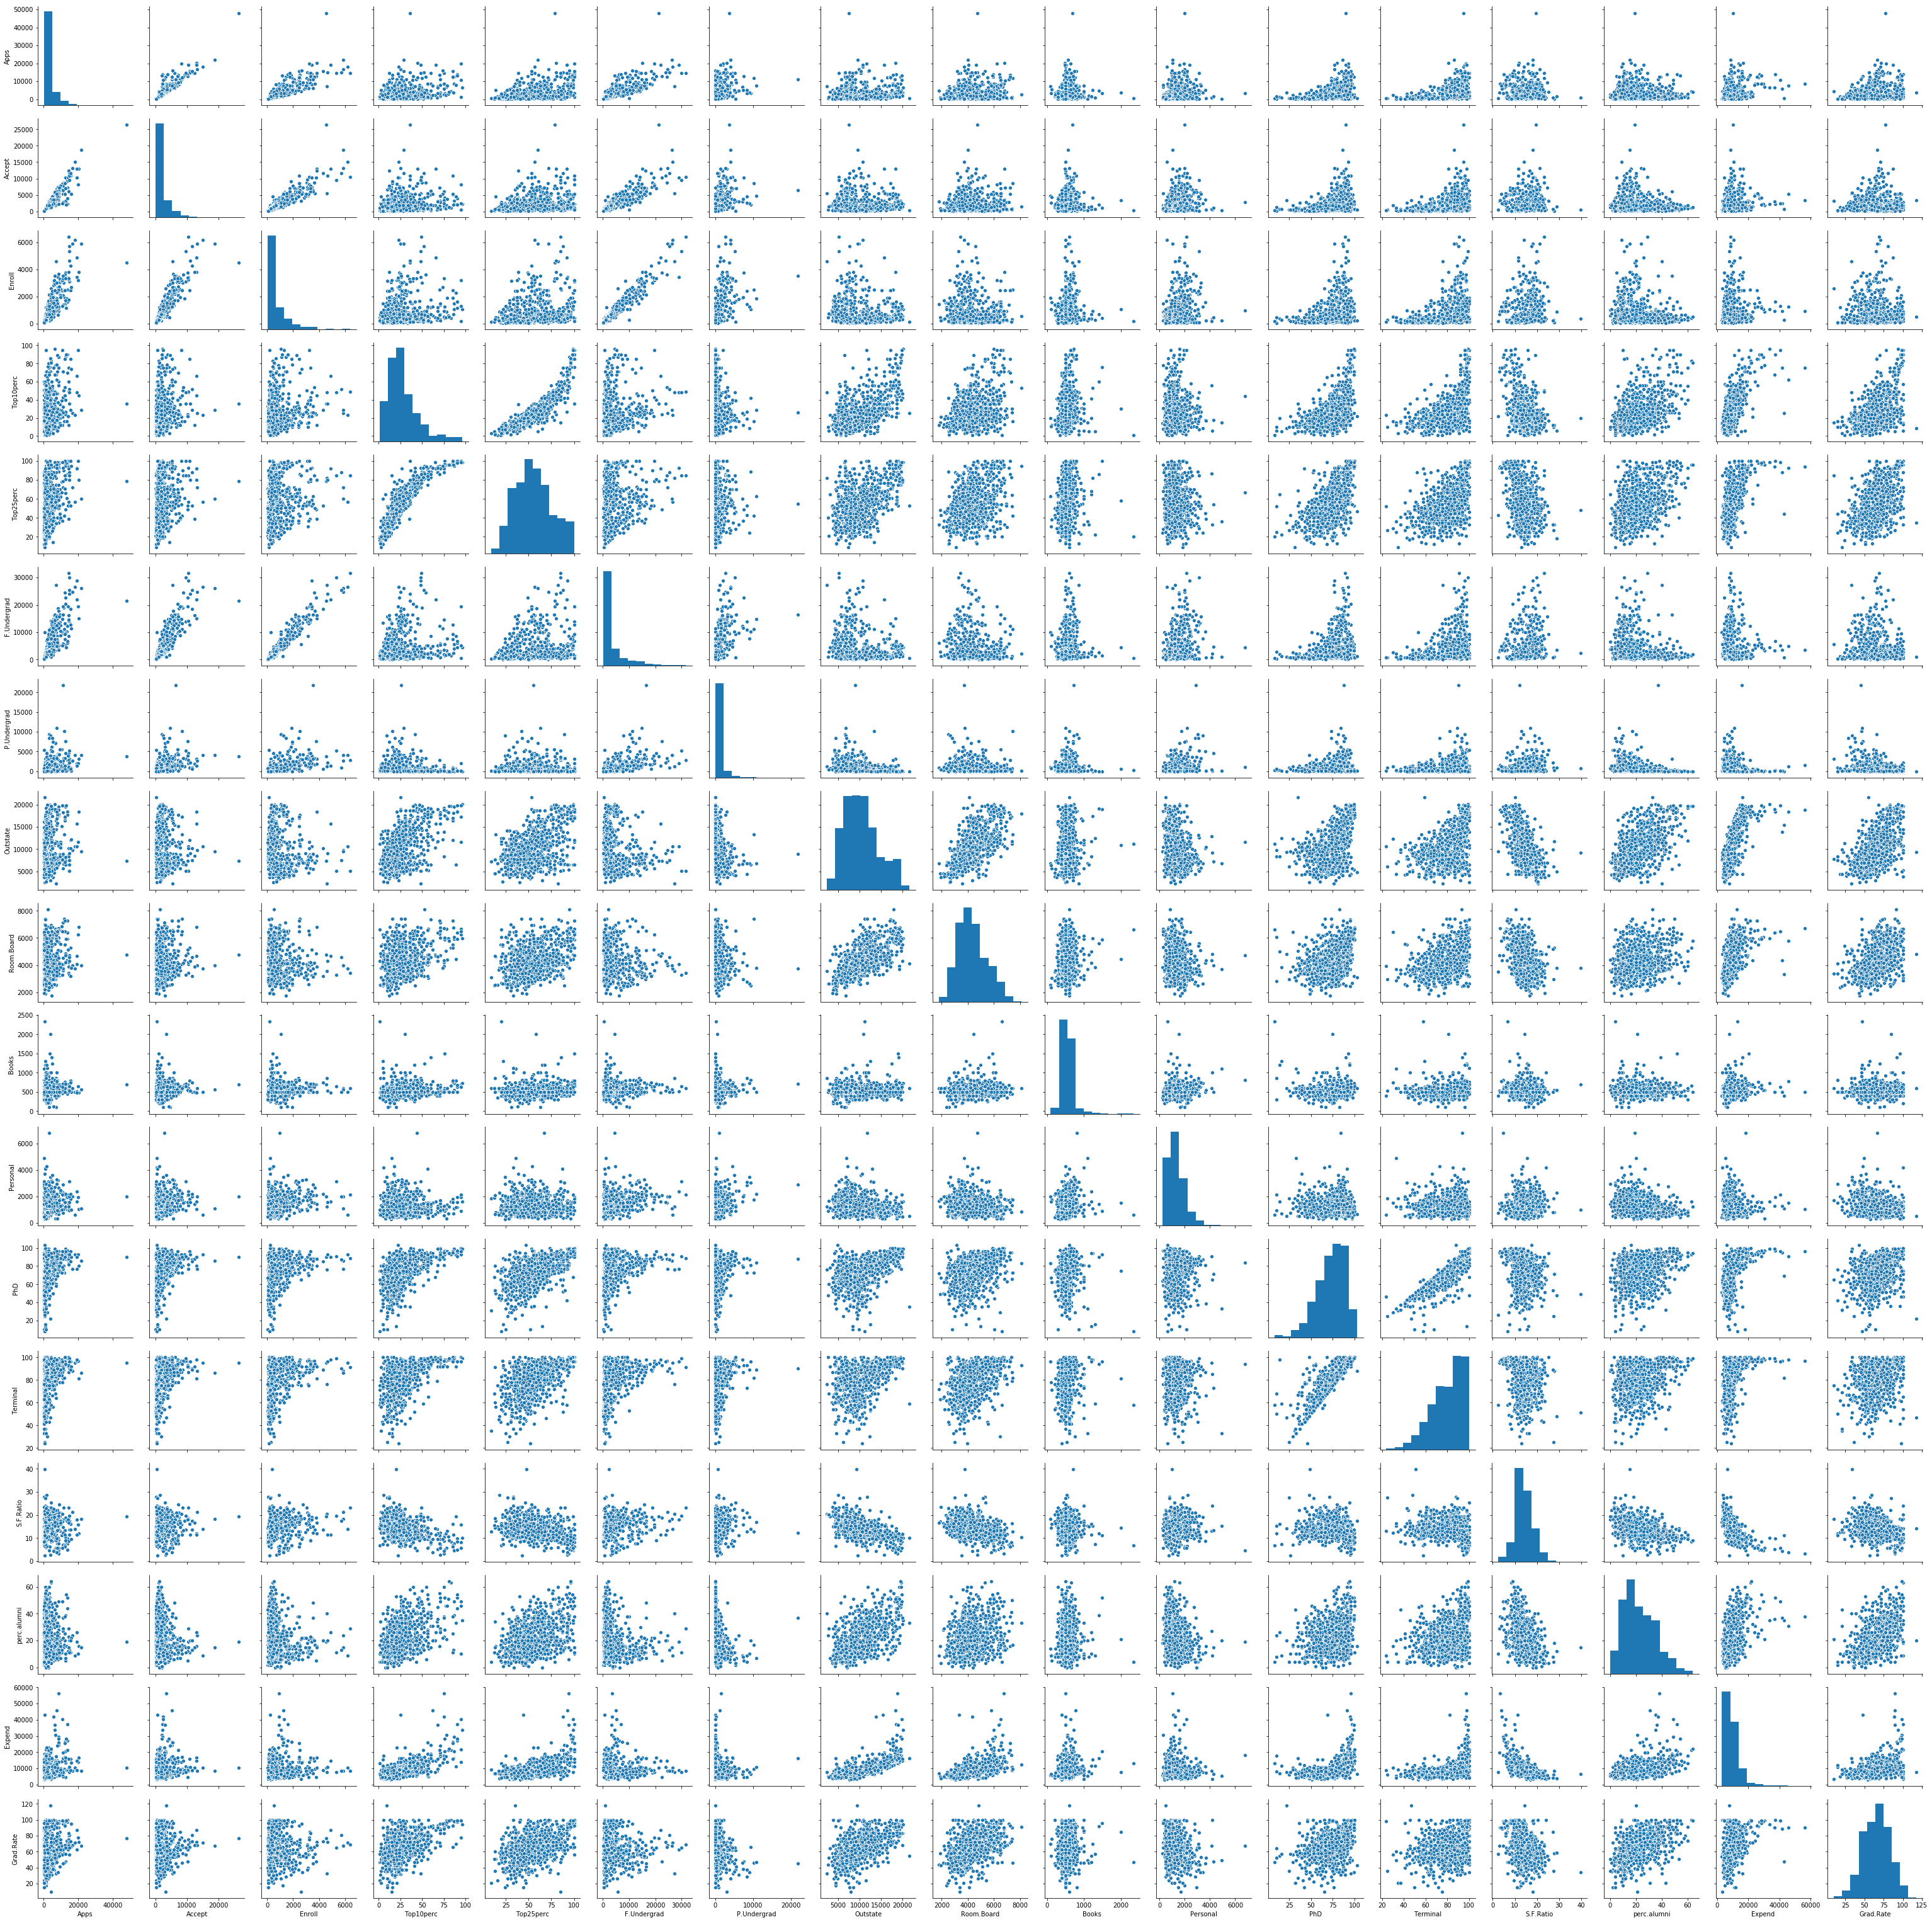

In [24]:
sns.pairplot(df)
plt.show()

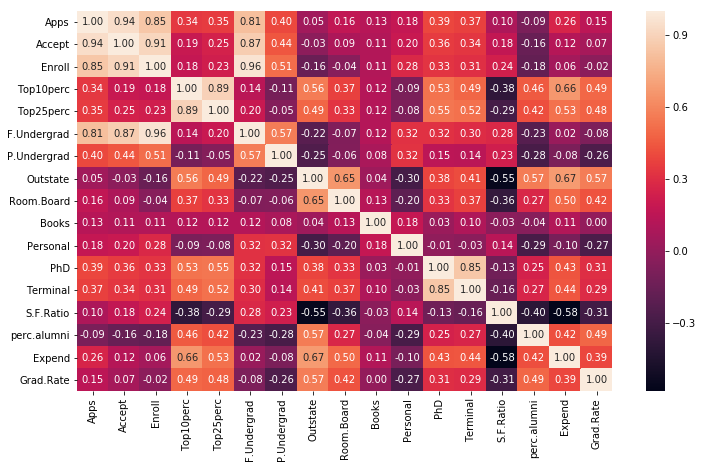

In [25]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

###### Insights

There is a strong correlation observed between few fields. 'Apps' is highly correlated to 'Accept' and 'Enroll'

Also, 'Apps' shows high correlation with 'F.undergrad'

whereas, 'S.F.Ratio' shows least correlation with 'Outstate'

In [26]:
df_cat = df.select_dtypes(include = ['object'])
df_num = df.select_dtypes(include = ['float64','int64'])

### 2.2) Is scaling necessary for PCA in this case? Give justification and perform scaling.

Yes, it is necessary to normalize data before performing PCA. The PCA calculates a new projection of your data set. ... If you normalize your data, all variables have the same standard deviation, thus all variables have the same weight and your PCA calculates relevant axis.

In [27]:
#Scale the data
from scipy.stats import zscore
df_scaled = df_num.apply(zscore)

In [28]:
df_scaled.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

### 2.3) Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].

Both covariance and correlation measure the relationship and the dependency between two variables.

$Covariance$ indicates the direction of the linear relationship between variables.

$Correlation$ measures both the strength and direction of the linear relationship between two variables.

$Covariance$ values are not standardized.

$Correlation$ values are standardized.

$Covariance$ can vary between - infinity to + infinity.

$Correlation$ can vary between - 1 to + 1.


In [29]:
df_scaled.cov()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.001289  0.944666  0.847913   0.339270   0.352093     0.815540   
Accept       0.944666  1.001289  0.912811   0.192695   0.247795     0.875350   
Enroll       0.847913  0.912811  1.001289   0.181527   0.227037     0.965883   
Top10perc    0.339270  0.192695  0.181527   1.001289   0.893144     0.141471   
Top25perc    0.352093  0.247795  0.227037   0.893144   1.001289     0.199702   
F.Undergrad  0.815540  0.875350  0.965883   0.141471   0.199702     1.001289   
P.Undergrad  0.398777  0.441839  0.513730  -0.105492  -0.053646     0.571247   
Outstate     0.050224 -0.025788 -0.155678   0.563055   0.490024    -0.216020   
Room.Board   0.165152  0.091016 -0.040284   0.371959   0.331917    -0.068979   
Books        0.132729  0.113672  0.112856   0.119012   0.115676     0.115699   
Personal     0.178961  0.201248  0.281291  -0.093437  -0.080914     0.317608   
PhD          0.391201  0.356216  0.331896   0.532513   0.546566     0.318747   
Terminal     0.369968  0.338018  0.308671   0.491768   0.525425     0.300406   
S.F.Ratio    0.095756  0.176456  0.237577  -0.385370  -0.295009     0.280064   
perc.alumni -0.090342 -0.160196 -0.181027   0.456072   0.418403    -0.229758   
Expend       0.259927  0.124878  0.064252   0.661765   0.528127     0.018676   
Grad.Rate    0.146944  0.067399 -0.022370   0.495627   0.477896    -0.078875   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398777  0.050224    0.165152  0.132729  0.178961  0.391201   
Accept          0.441839 -0.025788    0.091016  0.113672  0.201248  0.356216   
Enroll          0.513730 -0.155678   -0.040284  0.112856  0.281291  0.331896   
Top10perc      -0.105492  0.563055    0.371959  0.119012 -0.093437  0.532513   
Top25perc      -0.053646  0.490024    0.331917  0.115676 -0.080914  0.546566   
F.Undergrad     0.571247 -0.216020   -0.068979  0.115699  0.317608  0.318747   
P.Undergrad     1.001289 -0.253839   -0.061405  0.081304  0.320294  0.149306   
Outstate       -0.253839  1.001289    0.655100  0.038905 -0.299472  0.383476   
Room.Board     -0.061405  0.655100    1.001289  0.128128 -0.199685  0.329627   
Books           0.081304  0.038905    0.128128  1.001289  0.179526  0.026940   
Personal        0.320294 -0.299472   -0.199685  0.179526  1.001289 -0.010950   
PhD             0.149306  0.383476    0.329627  0.026940 -0.010950  1.001289   
Terminal        0.142086  0.408509    0.375022  0.100084 -0.030653  0.850682   
S.F.Ratio       0.232830 -0.555536   -0.363095 -0.031970  0.136521 -0.130698   
perc.alumni    -0.281154  0.566992    0.272714 -0.040260 -0.286337  0.249330   
Expend         -0.083676  0.673646    0.502386  0.112554 -0.098018  0.433319   
Grad.Rate      -0.257332  0.572026    0.425489  0.001062 -0.269691  0.305431   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369968   0.095756    -0.090342  0.259927   0.146944  
Accept       0.338018   0.176456    -0.160196  0.124878   0.067399  
Enroll       0.308671   0.237577    -0.181027  0.064252  -0.022370  
Top10perc    0.491768  -0.385370     0.456072  0.661765   0.495627  
Top25perc    0.525425  -0.295009     0.418403  0.528127   0.477896  
F.Undergrad  0.300406   0.280064    -0.229758  0.018676  -0.078875  
P.Undergrad  0.142086   0.232830    -0.281154 -0.083676  -0.257332  
Outstate     0.408509  -0.555536     0.566992  0.673646   0.572026  
Room.Board   0.375022  -0.363095     0.272714  0.502386   0.425489  
Books        0.100084  -0.031970    -0.040260  0.112554   0.001062  
Personal    -0.030653   0.136521    -0.286337 -0.098018  -0.269691  
PhD          0.850682  -0.130698     0.249330  0.433319   0.305431  
Terminal     1.001289  -0.160310     0.267475  0.439365   0.289900  
S.F.Ratio   -0.160310   1.001289    -0.403448 -0.584584  -0.307106  
perc.alumni  0.267475  -0.403448     1.001289  0.418250   0.491530  
Expend       0.439365  -0.58458

In [30]:
df_scaled.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

### 2.4) Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]

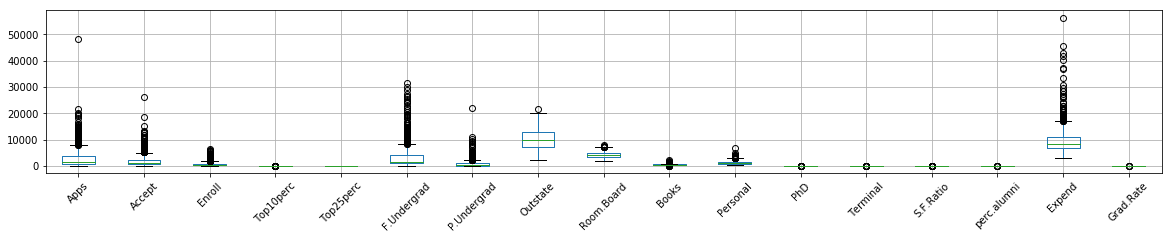

In [31]:
#Check for presence of outliers in each feature
df.boxplot(figsize=(20,3))
plt.xticks(rotation=45)
plt.show()

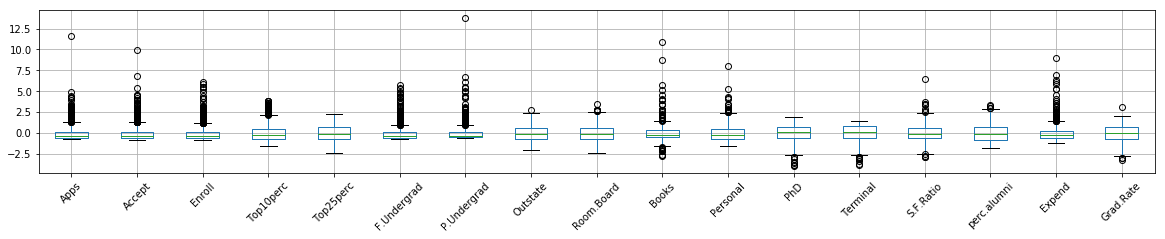

In [32]:
#Check to verify if outliers have been treated
df_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=45)
plt.show()

###### Insights

The range in y axis is in 10000 difference in the original dataframe, whereas the range of scaled data where in 2.5 difference. The data where on different scaling. So, the values in 'Top10perc' and 'Top25perc' box plot is not visible in the original dataframe. whereas, after scaling all the values are converted to the same range.

### 2.5)Extract the eigenvalues and eigenvectors.[Using Sklearn PCA Print Both]

#### Bartletts Test of Sphericity
Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

- H0: All variables in the data are uncorrelated
- Ha: At least one pair of variables in the data are correlated


In [33]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [34]:
chi_square_value,p_value=calculate_bartlett_sphericity(df_scaled)
p_value

0.0

The p-value is small, So we can reject the null hypothesis and agree that there is atleast one pair of variables in the data which are correlated hence PCA is recommended.

#### KMO Test

The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [35]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num)
kmo_model

0.8131251200373503

MSA(0.8131251200373503) > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7, random_state=123)
df_pca = pca.fit_transform(df_scaled)
df_pca.transpose() # Component output

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352397e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073537e-01,  2.27879812e+00, -4.38092811e-01, ...,
        -4.05641899e-04,  2.07356368e+00, -1.32891515e+00],
       ...,
       [-7.43975398e-01,  1.05999660e+00, -3.69613274e-01, ...,
        -5.16021118e-01, -9.47754745e-01, -1.13217594e+00],
       [-2.98306081e-01, -1.77137309e-01, -9.60591689e-01, ...,
         4.68014248e-01, -2.06993738e+00,  8.39893087e-01],
       [ 6.38443468e-01,  2.36753302e-01, -2.48276091e-01, ...,
        -1.31749158e+00,  8.33276555e-02,  1.30731260e+00]])

In [37]:
eigen_vector = pca.components_
print("eigen values are - ",eigen_vector)

eigen values are -  [[ 0.2487656   0.2076015   0.17630359  0.35427395  0.34400128  0.15464096
   0.0264425   0.29473642  0.24903045  0.06475752 -0.04252854  0.31831287
   0.31705602 -0.17695789  0.20508237  0.31890875  0.25231565]
 [ 0.33159823  0.37211675  0.40372425 -0.08241182 -0.04477866  0.41767377
   0.31508783 -0.24964352 -0.13780888  0.05634184  0.21992922  0.05831132
   0.04642945  0.24666528 -0.24659527 -0.13168986 -0.16924053]
 [-0.0630921  -0.10124906 -0.08298557  0.03505553 -0.02414794 -0.06139298
   0.13968172  0.04659887  0.14896739  0.67741165  0.49972112 -0.12702837
  -0.06603755 -0.2898484  -0.14698927  0.22674398 -0.20806465]
 [ 0.28131053  0.26781735  0.16182677 -0.05154725 -0.10976654  0.10041234
  -0.15855849  0.13129136  0.18499599  0.08708922 -0.23071057 -0.53472483
  -0.51944302 -0.16118949  0.01731422  0.07927349  0.26912907]
 [ 0.00574141  0.05578609 -0.05569364 -0.39543434 -0.42653359 -0.04345437
   0.30238541  0.222532    0.56091947 -0.12728883 -0.22231102 

In [38]:
eigen_value = pca.explained_variance_ratio_ 
l = pca.explained_variance_ratio_ 

print("eigen values are - ",eigen_value)

eigen values are -  [0.32020628 0.26340214 0.06900917 0.05922989 0.05488405 0.04984701
 0.03558871]


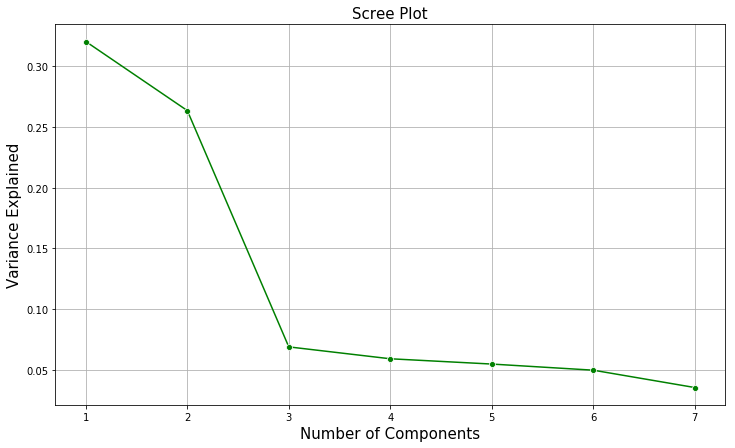

In [39]:
plt.figure(figsize=(12,7))
sns.lineplot(y=eigen_value,x=range(1,len(eigen_value)+1),marker='o',color='green')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

### 2.6)Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [40]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df_scaled))
df_pca_loading.shape

(7, 17)

In [41]:
df_pca_loading.head(7)

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.248766  0.207602  0.176304   0.354274   0.344001     0.154641   
1  0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2 -0.063092 -0.101249 -0.082986   0.035056  -0.024148    -0.061393   
3  0.281311  0.267817  0.161827  -0.051547  -0.109767     0.100412   
4  0.005741  0.055786 -0.055694  -0.395434  -0.426534    -0.043454   
5 -0.016237  0.007535 -0.042558  -0.052693   0.033092    -0.043454   
6 -0.042486 -0.012950 -0.027693  -0.161332  -0.118486    -0.025076   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.026443  0.294736    0.249030  0.064758 -0.042529  0.318313  0.317056   
1     0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2     0.139682  0.046599    0.148967  0.677412  0.499721 -0.127028 -0.066038   
3    -0.158558  0.131291    0.184996  0.087089 -0.230711 -0.534725 -0.519443   
4     0.302385  0.222532    0.560919 -0.127289 -0.222311  0.140166  0.204720   
5    -0.191199 -0.030000    0.162755  0.641055 -0.331398  0.091256  0.154928   
6     0.061042  0.108529    0.209744 -0.149692  0.633790 -0.001096 -0.028477   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.176958     0.205082  0.318909   0.252316  
1   0.246665    -0.246595 -0.131690  -0.169241  
2  -0.289848    -0.146989  0.226744  -0.208065  
3  -0.161189     0.017314  0.079273   0.269129  
4  -0.079388    -0.216297  0.075958  -0.109268  
5   0.487046    -0.047340 -0.298119   0.216163  
6   0.219259     0.243321 -0.226584   0.559944

### 2.7) Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [57]:
print("the explicit form of the first PC")
df_pca_loading_first_row = df_pca_loading.head(1)
round(df_pca_loading_first_row,2)

the explicit form of the first PC


Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  0.25    0.21    0.18       0.35       0.34         0.15         0.03   

   Outstate  Room.Board  Books  Personal   PhD  Terminal  S.F.Ratio  \
0      0.29        0.25   0.06     -0.04  0.32      0.32      -0.18   

   perc.alumni  Expend  Grad.Rate  
0         0.21    0.32       0.25

In [61]:
first_pc = []
col=[]
for i in range(0,len(eigen_vector[0])):
    first_pc.append(df_pca_loading_first_row[df_pca_loading_first_row.columns[i]][0]*eigen_vector[0][i])
    col.append(df_pca_loading_first_row.columns[i])
s = pd.DataFrame(zip(col,first_pc),columns=['column','PC1']).T
s

0          1         2          3          4            5   \
column       Apps     Accept    Enroll  Top10perc  Top25perc  F.Undergrad   
PC1     0.0618843  0.0430984  0.031083    0.12551   0.118337    0.0239138   

                 6          7           8           9           10        11  \
column  P.Undergrad   Outstate  Room.Board       Books    Personal       PhD   
PC1     0.000699206  0.0868696   0.0620162  0.00419354  0.00180868  0.101323   

              12         13           14        15         16  
column  Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
PC1     0.100525  0.0313141    0.0420588  0.101703  0.0636632

#### linear equation formula

#### $PC$ = m1x1+m2x2+m3x3+....m17x17

PC1= 0.25*Apps + 0.21*Accept + 0.18*Enroll + 0.35*Top10perc + 0.34*Top25perc + 0.15*F.Undergrad+ 0.03*P.Undergrad + 0.29*Outstate + 0.25*Room.Board + 0.06*Books + -0.04*Personal + 0.32*PhD +0.32*Terminal + -0.18*S.F.Ratio + 0.21*perc.alumni + 0.32*Expend + 0.25*Grad.Rate

In [44]:
l1 = []
l1.append(l[0])
for i in range(1,len(l)):
    l1.append(l[i-1]+l[1])
l2 = ["PC"+str(i) for i in range(1,len(l)+1)]
df = pd.DataFrame(zip(l1,l2),columns=['ratio','PC'])

In [45]:
df = round(df,2)
df

ratio   PC
0   0.32  PC1
1   0.58  PC2
2   0.53  PC3
3   0.33  PC4
4   0.32  PC5
5   0.32  PC6
6   0.31  PC7

In [46]:
from matplotlib.patches import Rectangle

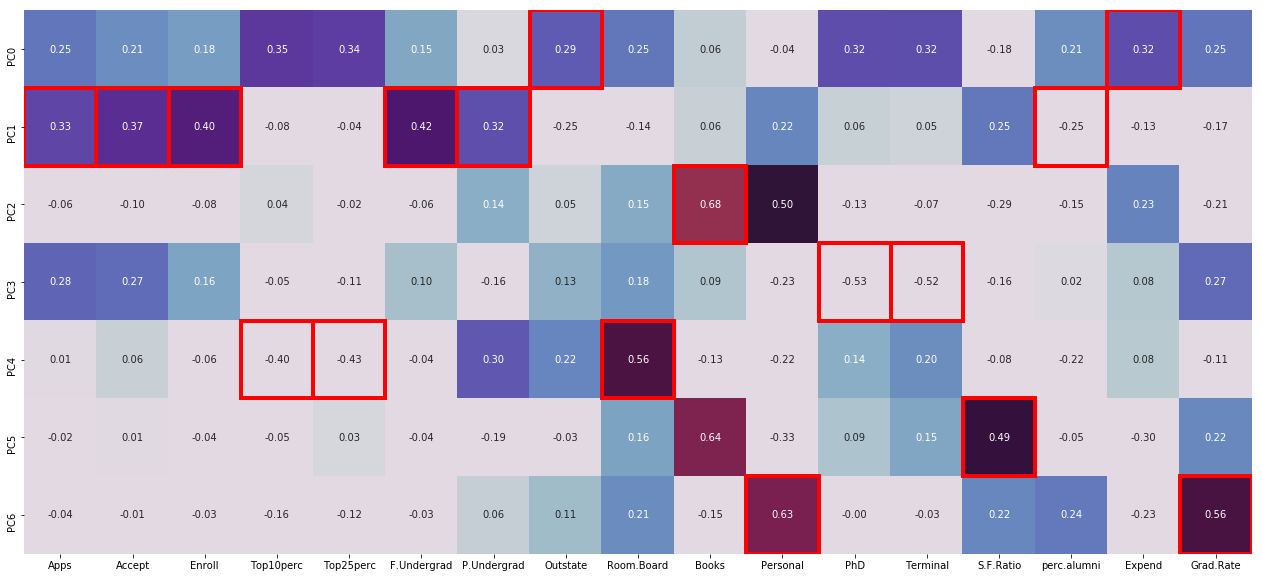

In [47]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='twilight', cbar=False, fmt='.2f', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5','PC6'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=4))

In [48]:
df_pca = pd.DataFrame(df_pca,columns=['Accommodation_expenses','Student_profiling','Books','Faculty_profiling',
                                  'Merit_lodging','S.F.ratio','Graduation_expenses'])
df_pca.head()

Accommodation_expenses  Student_profiling     Books  Faculty_profiling  \
0               -1.592855           0.767334 -0.101074          -0.921749   
1               -2.192402          -0.578830  2.278798           3.588918   
2               -1.430964          -1.092819 -0.438093           0.677241   
3                2.855557          -2.630612  0.141722          -1.295486   
4               -2.212008           0.021631  2.387030          -1.114538   

   Merit_lodging  S.F.ratio  Graduation_expenses  
0      -0.743975  -0.298306             0.638443  
1       1.059997  -0.177137             0.236753  
2      -0.369613  -0.960592            -0.248276  
3      -0.183837  -1.059508            -1.249356  
4       0.684451   0.004918            -2.159220

In [49]:
df_pca.shape

(777, 7)

In [50]:
df_new = pd.concat([df_cat, df_pca], axis=1)
df_new.head()

Names  Accommodation_expenses  Student_profiling  \
0  Abilene Christian University               -1.592855           0.767334   
1            Adelphi University               -2.192402          -0.578830   
2                Adrian College               -1.430964          -1.092819   
3           Agnes Scott College                2.855557          -2.630612   
4     Alaska Pacific University               -2.212008           0.021631   

      Books  Faculty_profiling  Merit_lodging  S.F.ratio  Graduation_expenses  
0 -0.101074          -0.921749      -0.743975  -0.298306             0.638443  
1  2.278798           3.588918       1.059997  -0.177137             0.236753  
2 -0.438093           0.677241      -0.369613  -0.960592            -0.248276  
3  0.141722          -1.295486      -0.183837  -1.059508            -1.249356  
4  2.387030          -1.114538       0.684451   0.004918            -2.159220

pd.DataFrame(df_pca,columns=['non_recurring_expen','proportion_fulltime_grad','Books','longitivity_faculty',
                                  'acadamic_lodging','S.f.ratio','grad allowance','correspondance_students'])

### 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

The cumulative value up to seventh Principal Component is 85.21. General rule of thumb is to choose first k PC’s such that the first k PC’s explain 70-90% of the total variance. Hence from the cumulative values of eigen values, help in selecting the required no. of PC’s. In this case first seven PC’s have been selectedcapturing 85.2% of variation and thereby reducing our dimension by half.

In [51]:
tot = sum(eigen_value)
total = 0;
cumm_eigen_value = []
for i in eigen_value:
    total=total+i;
    cumm_eigen_value.append(total)
print(cumm_eigen_value,"\n")
var_exp = [( i /tot ) * 100 for i in sorted(eigen_value, reverse=True)]
var_exp


cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", round(tot*100,2),"%")

[0.3202062819886914, 0.5836084263498161, 0.6526175918920409, 0.7118474841213039, 0.7667315352248886, 0.8165785447704629, 0.8521672596879294] 

Cumulative Variance Explained 85.22 %


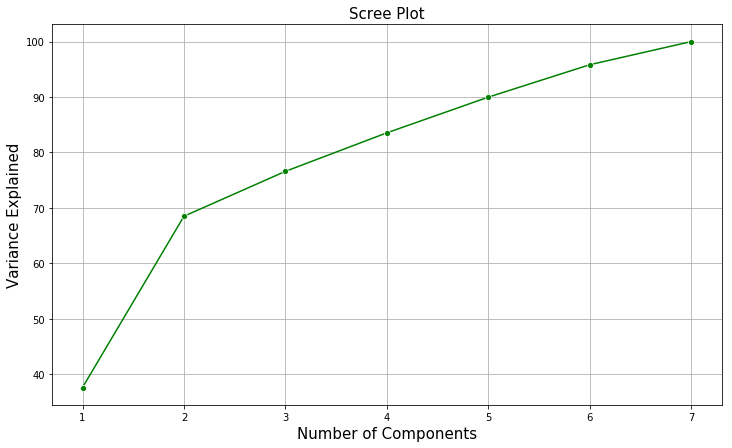

In [52]:
plt.figure(figsize=(12,7))
sns.lineplot(y=cum_var_exp,x=range(1,len(cum_var_exp)+1),marker='o',color='green')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [53]:

import plotly.express as px

exp_var_cumul = np.cumsum(eigen_value)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)
